In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [18]:
iris = pd.read_csv('IRIS.csv')

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


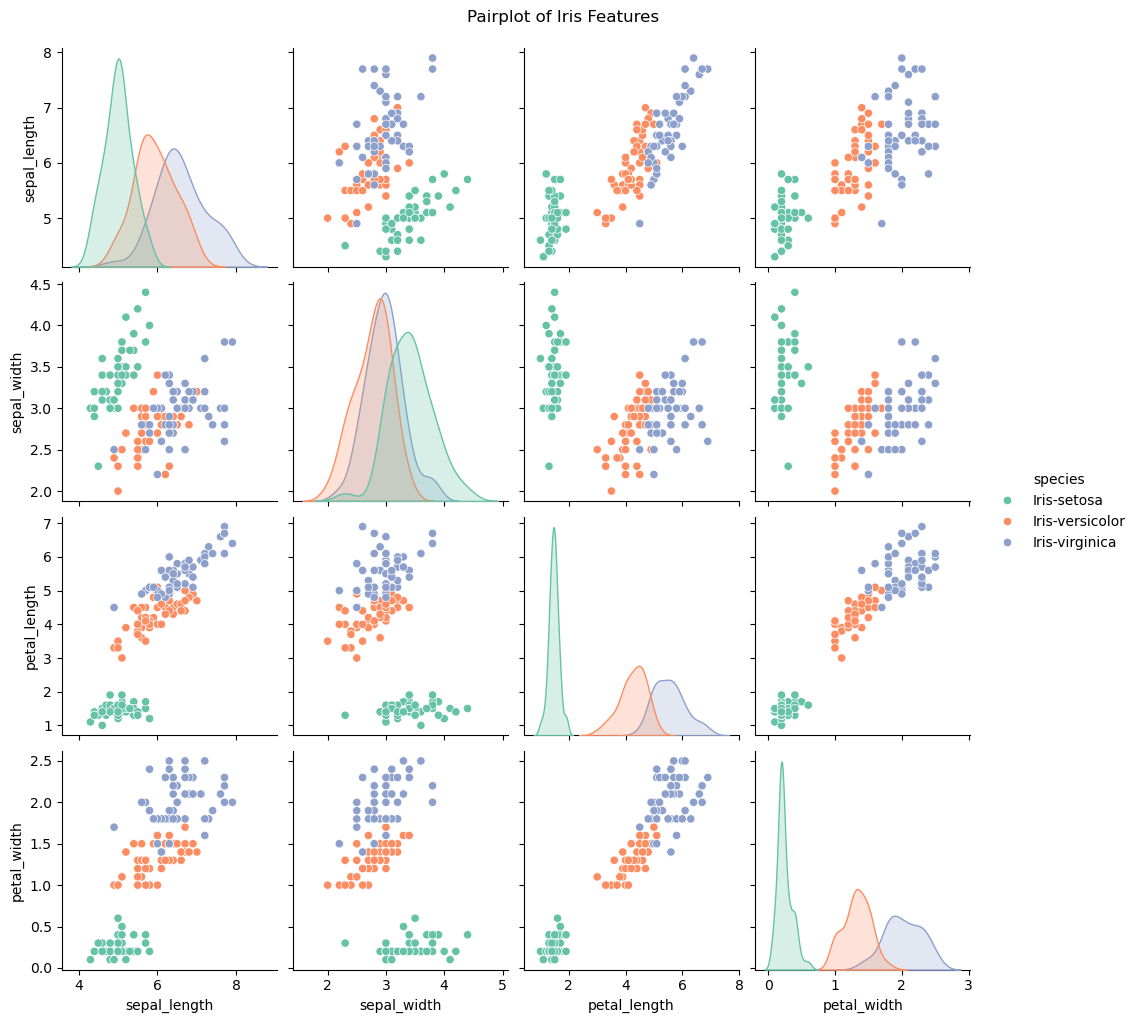

In [21]:
sns.pairplot(iris, hue="species", diag_kind="kde", palette="Set2")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [22]:
#split the data into featurs (X) and label (Y) 
x = iris.drop(columns = ['species'])
y = iris['species']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


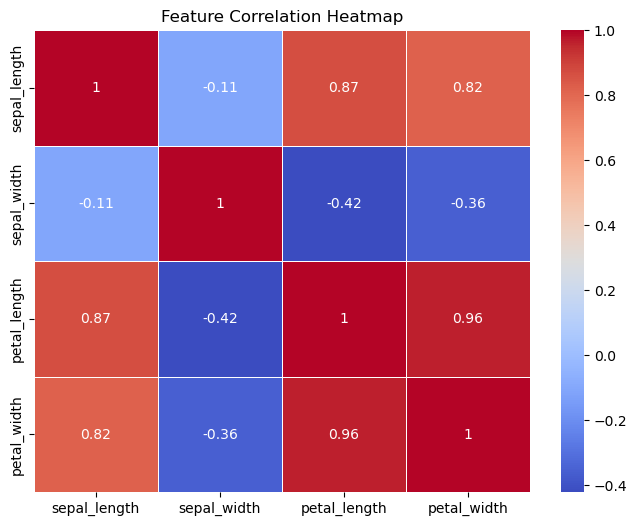

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(iris.drop("species", axis=1).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

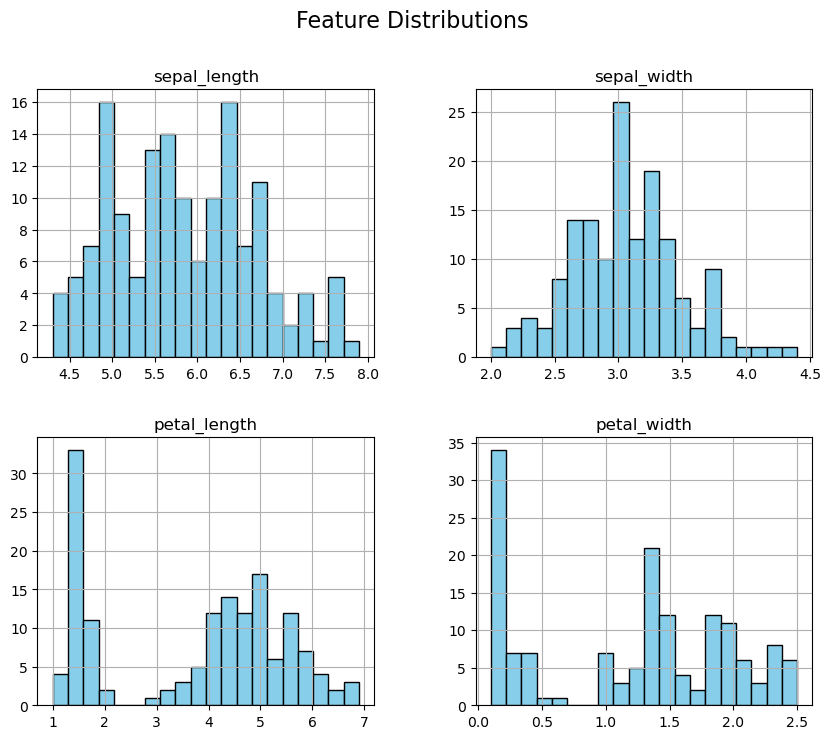

In [27]:
iris.drop("species", axis=1).hist(figsize=(10,8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", size=16)
plt.show()

In [28]:
model = LogisticRegression()

In [29]:
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(x_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [31]:
predictions = model.predict([[4.6,3.5,1.5,0.2]])

In [32]:
print(predictions)

['Iris-versicolor']


In [33]:
new_data = np.array([[5.1,3.5,1.4,0.2],
                    [6.3,2.9,5.6,1.8],
                    [4.9,3.0,1.4,0.2]])

In [34]:
new_data_scaled = scaler.transform(new_data)

In [35]:
predictions = model.predict(new_data_scaled)

In [36]:
print(predictions)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa']
